## EDEP SIMULATION ANALYSIS ## 

*The objective of this script is to analyze the trajectories for different kinds of events obtained through a Monte-Carlo simulation.*

The data is located in a ".hdf5" file which contains all the raw data in a no array-like structure. The data is set different from each other using the numpy datatype method. The contents of the file have five different kind of main distinc arangements:
- mc_hdr
- mc_stack
- segments
- trajectories
- vertices

On each, the data can be contrasted from other using the dtype method. 

**NOTE**: I'm using the NDLAR simulation converted to hdf5 file from local.

### Let's start the program ###

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import h5py
import numpy as np
from matplotlib import cm, colors

#Let's import the file:
sim_file='/home/enrique/Documents/WorkStuff/Work1/MicroProdN1p2_NDLAr_1E18_RHC.convert2h5.nu.0000100.EDEPSIM.hdf5'
sim_h5= h5py.File(sim_file,'r')
#And observe the file contents.
print('\n----------------- File content -----------------')
print('File:',sim_file)
print('Keys in file:',list(sim_h5.keys()))
for key in sim_h5.keys():
    print('Number of',key,'entries in file:', len(sim_h5[key]))
print('------------------------------------------------\n')

# Let's split the datasets that we have.
mc_hdr = sim_h5['mc_hdr']
mc_stack = sim_h5['mc_stack']
segments = sim_h5['segments']
trajectories = sim_h5['trajectories']
vertices= sim_h5['vertices']
# Also let's declare the  particles that we would like to see.
# This will come in handy later on the scipt
pdg_color = { 
11 : 'blue', #electron
13 : 'purple', #muon
22 :  'yellow', #gamma
2212:  'black', #proton
2112:  'gray', #neutron
111:   'pink', #pi0
211:   'cyan', #pi+
0: 'red',
11: 'blue', #positron
#14: 'green' # muon neutrino
}
labels = pdg_color.keys()
#Let's also print the information inside the mc_hdr for the type of events that we have.
print("Kinds of objects inside the mc_hdr dataset: ")
print("")
print(mc_hdr.dtype)
print("")
#We put the information of one event in just one dataset
mc_event=mc_hdr[mc_hdr['event_id']==100000]
events_ids, counts=np.unique(segments['event_id'],return_counts=True)
print(mc_event)
print("")
print("number of events")
print(events_ids,counts)


----------------- File content -----------------
File: /home/enrique/Documents/WorkStuff/Work1/MicroProdN1p2_NDLAr_1E18_RHC.convert2h5.nu.0000100.EDEPSIM.hdf5
Keys in file: ['mc_hdr', 'mc_stack', 'segments', 'trajectories', 'vertices']
Number of mc_hdr entries in file: 2040
Number of mc_stack entries in file: 19137
Number of segments entries in file: 6582081
Number of trajectories entries in file: 4369814
Number of vertices entries in file: 2040
------------------------------------------------

Kinds of objects inside the mc_hdr dataset: 

{'names': ['event_id', 'vertex_id', 'x_vert', 'y_vert', 'z_vert', 't_vert', 'target', 'reaction', 'isCC', 'isQES', 'isMEC', 'isRES', 'isDIS', 'isCOH', 'Enu', 'nu_4mom', 'nu_pdg', 'Elep', 'lep_mom', 'lep_ang', 'lep_pdg', 'q0', 'q3', 'Q2', 'x', 'y'], 'formats': ['<u4', '<u8', '<f4', '<f4', '<f4', '<f8', '<u4', '<i4', '?', '?', '?', '?', '?', '?', '<f4', ('<f4', (4,)), '<i4', '<f4', '<f4', '<f4', '<i4', '<f4', '<f4', '<f4', '<f4', '<f4'], 'offsets': [0

Let's split one interaction vertex for one event. 

913.5861


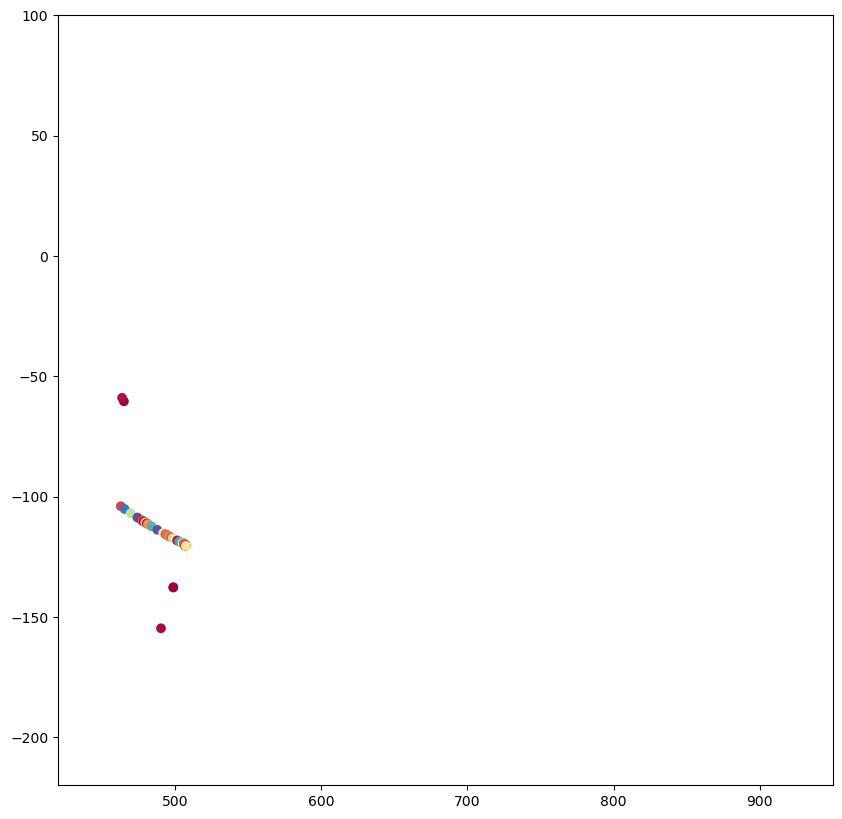

In [58]:
seg_event=segments[segments['event_id']==100000]
print(seg_event['z'].max())
vertex_ids, counts=np.unique(seg_event['vertex_id'],return_counts=True)
int_vert=seg_event[seg_event['vertex_id']==vertex_ids[4]]
filt_vert=int_vert[int_vert['dE']>0.6]
plt.xlim(420,950)
plt.ylim(-220,100)
#plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(filt_vert['z'],filt_vert['y'],c=filt_vert['dE'],cmap='Spectral')

It looks that the probable way to go is to restrict the energies to filter the events. Let's look at the kind of events.

In [ ]:
info_event=mc_hdr[mc_hdr['event_id']==100000]
info_event[info_event['isCC']==False]

dtype({'names': ['event_id', 'vertex_id', 'x_vert', 'y_vert', 'z_vert', 't_vert', 'target', 'reaction', 'isCC', 'isQES', 'isMEC', 'isRES', 'isDIS', 'isCOH', 'Enu', 'nu_4mom', 'nu_pdg', 'Elep', 'lep_mom', 'lep_ang', 'lep_pdg', 'q0', 'q3', 'Q2', 'x', 'y'], 'formats': ['<u4', '<u8', '<f4', '<f4', '<f4', '<f8', '<u4', '<i4', '?', '?', '?', '?', '?', '?', '<f4', ('<f4', (4,)), '<i4', '<f4', '<f4', '<f4', '<i4', '<f4', '<f4', '<f4', '<f4', '<f4'], 'offsets': [0, 8, 16, 20, 24, 32, 40, 44, 48, 49, 50, 51, 52, 53, 56, 60, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112], 'itemsize': 120})

Let's try to show all of the interaction events with their respective tag. 

In [104]:
kind=info_event.dtype.names[8:14]
info_vertex=info_event[info_event['vertex_id']==1000000002]
name=[]
for kin in kind:
    if info_vertex[kin]==True:
        name.append(kin)
        print(name)
    
print(' '.join(name))

['isCC']
['isCC', 'isRES']
isCC isRES


In [ ]:
file=PdfPages("Interaction Vertex.pdf")
for evid in events_ids:
    seg_event=segments[segments['event_id']==evid]
    info_event=mc_hdr[mc_hdr['event_id']==evid]
    vertex_ids, counts=np.unique(seg_event['vertex_id'],return_counts=True)
    norm=colors.Normalize(0,np.max(seg_event['dE']))
    for vid in vertex_ids:
        int_vert=seg_event[seg_event['vertex_id']==vid]
        filt_vert=int_vert[int_vert['dE']>0.6]
        info_vertex=info_event[info_event['vertex_id']==vid]
        name=[]
        for kin in kind:
            if info_vertex[kin]==True:
                name.append(kin)
        print(evid,vid)
        figure, bars= plt.subplots()
        bars.set_title("Interaction kind: "+ ' '.join(name))
        bars.set_xlabel(" Y (cm)" )
        bars.set_ylabel(" Z (cm)")
        bars.set_xlim(420,950)
        bars.set_ylim(-220,100)
#plt.rcParams['figure.figsize'] = [10, 10]
        bars.scatter(filt_vert['z'],filt_vert['y'],c=filt_vert['dE'],cmap='Spectral')
        figure.colorbar(cm.ScalarMappable(norm=norm,cmap='Spectral'),ax=bars,label="Energy Deposition (MeV)")
        file.savefig(figure)
file.close()

100000 1000000000
100000 1000000001
100000 1000000002
100000 1000000003
100000 1000000004
100000 1000000006
100000 1000000007
100000 1000000008
100000 1000000009
100000 1000000010
100000 1000000011
100000 1000000012
100000 1000000013
100000 1000000014
100000 1000000015
100000 1000000016
100000 1000000017
100000 1000000018
100000 1000000019
100001 1000000020
100001 1000000021
100001 1000000022
100001 1000000023


/tmp/ipykernel_13990/2342360553.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure, bars= plt.subplots()


100001 1000000024
100001 1000000025
100001 1000000026
100001 1000000027
100001 1000000028
100001 1000000029
100001 1000000030
100001 1000000031
100001 1000000032
100001 1000000033
100001 1000000034
100001 1000000035
100002 1000000036
100002 1000000037
100002 1000000038
100002 1000000039
100002 1000000040
100002 1000000041
100002 1000000042
100002 1000000043
100002 1000000044
100002 1000000045
100002 1000000046
100002 1000000047
100002 1000000048
100003 1000000049
100003 1000000050
100003 1000000051
100003 1000000052
100003 1000000053
100003 1000000054
100003 1000000055
100003 1000000056
100003 1000000057
100003 1000000058
100004 1000000059
100004 1000000061
100004 1000000062
100004 1000000063
100004 1000000064
100004 1000000065
100004 1000000066
100004 1000000067
100004 1000000068
100004 1000000069
100004 1000000070
100004 1000000071
100004 1000000072
100004 1000000073
100004 1000000075
100005 1000000076
100005 1000000077
100005 1000000078
100005 1000000079
100005 1000000080
100005 100